## Problem Statement -1
### Output variable -> y
### y -> Whether the client has subscribed a term deposit or not
### Binomial ("yes" or "no")

In [57]:
# Importing libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import accuracy_score as ac
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from imblearn.over_sampling import SMOTE

In [39]:
# Reading the dataset
bank = pd.read_csv('bank-full.csv', sep=';')
bank1 = bank.tail(5)

In [40]:
# Performing EDA
print("Shape of the dataset:", bank.shape)
print("Number of duplicate rows:", bank.duplicated().sum())
print("Unique values in 'job' column:", np.unique(b_data["job"]))
print("Missing values in the dataset:\n", bank.isnull().sum())
print("Descriptive statistics:\n", bank.describe())
print("First two rows of the dataset:\n", bank.head(2))

Shape of the dataset: (45211, 17)
Number of duplicate rows: 0
Unique values in 'job' column: ['admin.' 'blue-collar' 'entrepreneur' 'housemaid' 'management' 'retired'
 'self-employed' 'services' 'student' 'technician' 'unemployed' 'unknown']
Missing values in the dataset:
 age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64
Descriptive statistics:
                 age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.00000

In [41]:
# Using One-Hot encoding on the data
d1 = pd.get_dummies(b_data, columns=['job', 'marital', 'education', 'contact', 'month', 'poutcome'])

In [43]:
# Using binary encoding on selected columns
d1['default'] = d1['default'].map({'no': 0, 'yes': 1})
d1['housing'] = d1['housing'].map({'no': 0, 'yes': 1})
d1['loan'] = d1['loan'].map({'no': 0, 'yes': 1})
d1['y'] = d1['y'].map({'no': 0, 'yes': 1})

In [44]:
# Model Building
X = pd.concat([d1.iloc[:, 0:10], d1.iloc[:, 11:]], axis = 1)
Y = d1.iloc[:, 10]
# Splitting the data into Training and Testing
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size= 0.3, shuffle = True)

In [45]:
# Handling class imbalance using SMOTE 
smote = SMOTE(random_state = 42)
x_train_res, y_train_res = smote.fit_resample(x_train, y_train)

In [46]:
parameters = {'penalty': ['l1', 'l2'], 'C': [0.1, 1, 10]}
model = LogisticRegression()
grid_search = GridSearchCV(model, parameters)
grid_search.fit(x_train_res, y_train_res)
best_model = grid_search.best_estimator_

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [47]:
classifier = LogisticRegression()
classifier.fit(x_train, y_train)


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [48]:
# Predicting
y_pred = classifier.predict(x_test)

In [49]:
# Evaluting the model
acc = ac(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

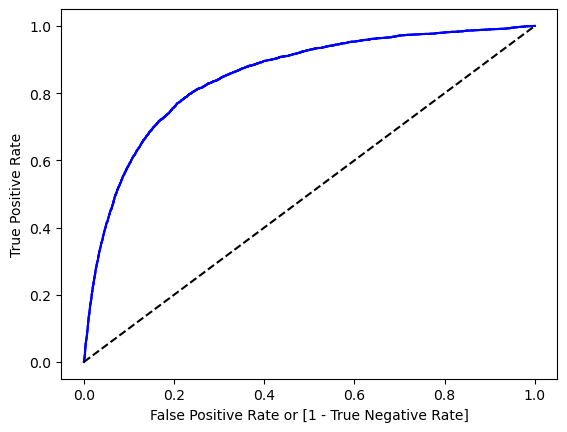

In [50]:
# Visualization
fpr, tpr, thresholds = roc_curve(Y, classifier.predict_proba(X)[:, 1])
plt.plot(fpr, tpr, color = 'blue')
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr, tpr, color = 'blue', label = 'Logit model (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()

In [51]:
# Accuracy
print( 'AUC accuracy:', auc)

AUC accuracy: 0.5970593152782494


In [52]:
# Evaluation Metrics
evaluation_metrics = classification_report(y_test, y_pred, output_dict=True)
f1_score = evaluation_metrics['1']['f1-score']
precision = evaluation_metrics['1']['precision']
recall = evaluation_metrics['1']['recall']

In [56]:
print('F1 Score is:', f1_score)
print('Precision is:', precision)
print('Recall is:', recall)

F1 Score is: 0.3135985198889917
Precision is: 0.5854922279792746
Recall is: 0.21415034744156664
